In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import rand_score
from scipy.stats import multivariate_normal

In [8]:

fifa = pd.read_csv("/content/FIFA23_official_data.csv")
fifa.head(5)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


#Exploracion del DataSEt


In [9]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

In [10]:
# Se verifican la cantida de valores nulos y en que columnas se encuentran
fifa.isnull().sum()

,0
ID,0
Name,0
Age,0
Photo,0
Nationality,0
Flag,0
Overall,0
Potential,0
Club,211
Club Logo,0


#Limpieza de Datos

Inicialmente se identifican columnas que no tienen informacion relevante para el objetivo del clustering el cual es evaluar el performace de cada jugador,tales como logo del club, club,foto, entre otras. Tambien se logra visualizar columnas con una gran cantidad de nulos.

In [11]:
#Eliminamos columnas que no tienen relacion hacia las caracteristicas, habilidad o desterzas de cada jugador
columnas=(['Photo','Flag','Club Logo','Real Face','Best Overall Rating','Loaned From','Joined',
           'Contract Valid Until','ID','Name','Nationality','Club','Kit Number','Position',
           'Work Rate','Body Type','Release Clause'])
fifa_limpio=fifa.drop(columns=columnas)
fifa_limpio


,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight
0,27,87,88,€91M,€115K,2312,Right,4.0,4.0,3.0,189cm,82kg
1,27,86,87,€78.5M,€190K,2305,Right,3.0,3.0,4.0,179cm,69kg
2,30,85,85,€46.5M,€46K,2303,Left,2.0,3.0,3.0,172cm,69kg
3,31,91,91,€107.5M,€350K,2303,Right,4.0,5.0,4.0,181cm,70kg
4,25,86,89,€89.5M,€110K,2296,Right,3.0,3.0,3.0,172cm,68kg
...,...,...,...,...,...,...,...,...,...,...,...,...
17655,19,48,61,€100K,€500,762,Right,1.0,3.0,1.0,190cm,78kg
17656,17,48,64,€100K,€500,761,Right,1.0,2.0,1.0,195cm,84kg
17657,25,51,56,€70K,€2K,759,Right,1.0,2.0,1.0,190cm,82kg
17658,18,50,65,€90K,€500,758,Right,1.0,2.0,1.0,187cm,79kg


In [12]:
#Reemplazamos la piera agil izquierda por 0 y derecha por 1
fifa_limpio["Preferred Foot"] = fifa_limpio["Preferred Foot"].replace({"Left": 0, "Right": 1})


<ipython-input-12-cdfbf3a93de9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fifa_limpio["Preferred Foot"] = fifa_limpio["Preferred Foot"].replace({"Left": 0, "Right": 1})


In [13]:
# Convertir a numericas columnas peso y talla
fifa_limpio['Weight'] = fifa_limpio['Weight'].str.replace('kg', '').astype(float)
fifa_limpio['Height'] = fifa_limpio['Height'].str.replace('cm', '').astype(float)
fifa_limpio

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight
0,27,87,88,€91M,€115K,2312,1,4.0,4.0,3.0,189.0,82.0
1,27,86,87,€78.5M,€190K,2305,1,3.0,3.0,4.0,179.0,69.0
2,30,85,85,€46.5M,€46K,2303,0,2.0,3.0,3.0,172.0,69.0
3,31,91,91,€107.5M,€350K,2303,1,4.0,5.0,4.0,181.0,70.0
4,25,86,89,€89.5M,€110K,2296,1,3.0,3.0,3.0,172.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17655,19,48,61,€100K,€500,762,1,1.0,3.0,1.0,190.0,78.0
17656,17,48,64,€100K,€500,761,1,1.0,2.0,1.0,195.0,84.0
17657,25,51,56,€70K,€2K,759,1,1.0,2.0,1.0,190.0,82.0
17658,18,50,65,€90K,€500,758,1,1.0,2.0,1.0,187.0,79.0


In [14]:
#Limpiamos las columnas Value y Wage que contiene simbolos de moneda se convierten todos  a una escala de miles

def limpiar_valores(valor):
  """
  Convierte datos en moneda a texto a escalas de miles

  IN: valor: str
  OUT: float
  """
  if isinstance(valor, str):
      valor = valor.replace("€", "")
      if valor.endswith("K"):
          return float(valor[:-1]) * 1000
      elif valor.endswith("M"):
          return float(valor[:-1]) * 1000000
      else:
          return float(valor) * 1000
  return valor




fifa_limpio["Value"] = fifa_limpio["Value"].apply(limpiar_valores)
fifa_limpio["Wage"] = fifa_limpio["Wage"].apply(limpiar_valores)

fifa_limpio

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight
0,27,87,88,91000000.0,115000.0,2312,1,4.0,4.0,3.0,189.0,82.0
1,27,86,87,78500000.0,190000.0,2305,1,3.0,3.0,4.0,179.0,69.0
2,30,85,85,46500000.0,46000.0,2303,0,2.0,3.0,3.0,172.0,69.0
3,31,91,91,107500000.0,350000.0,2303,1,4.0,5.0,4.0,181.0,70.0
4,25,86,89,89500000.0,110000.0,2296,1,3.0,3.0,3.0,172.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17655,19,48,61,100000.0,500000.0,762,1,1.0,3.0,1.0,190.0,78.0
17656,17,48,64,100000.0,500000.0,761,1,1.0,2.0,1.0,195.0,84.0
17657,25,51,56,70000.0,2000.0,759,1,1.0,2.0,1.0,190.0,82.0
17658,18,50,65,90000.0,500000.0,758,1,1.0,2.0,1.0,187.0,79.0


#Escalada de Datos

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fifa_limpio[fifa_limpio.columns] = scaler.fit_transform(fifa_limpio[fifa_limpio.columns])
fifa_limpio.head()

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight
0,0.307692,0.916667,0.867925,0.477690,0.121053,1.000000,1.0,0.75,0.75,0.50,0.701754,0.548387
1,0.307692,0.895833,0.849057,0.412073,0.200000,0.995521,1.0,0.50,0.50,0.75,0.526316,0.338710
2,0.384615,0.875000,0.811321,0.244094,0.048421,0.994242,0.0,0.25,0.50,0.50,0.403509,0.338710
3,0.410256,1.000000,0.924528,0.564304,0.368421,0.994242,1.0,0.75,1.00,0.75,0.561404,0.354839
4,0.256410,0.895833,0.886792,0.469816,0.115789,0.989763,1.0,0.50,0.50,0.50,0.403509,0.322581


#GMM

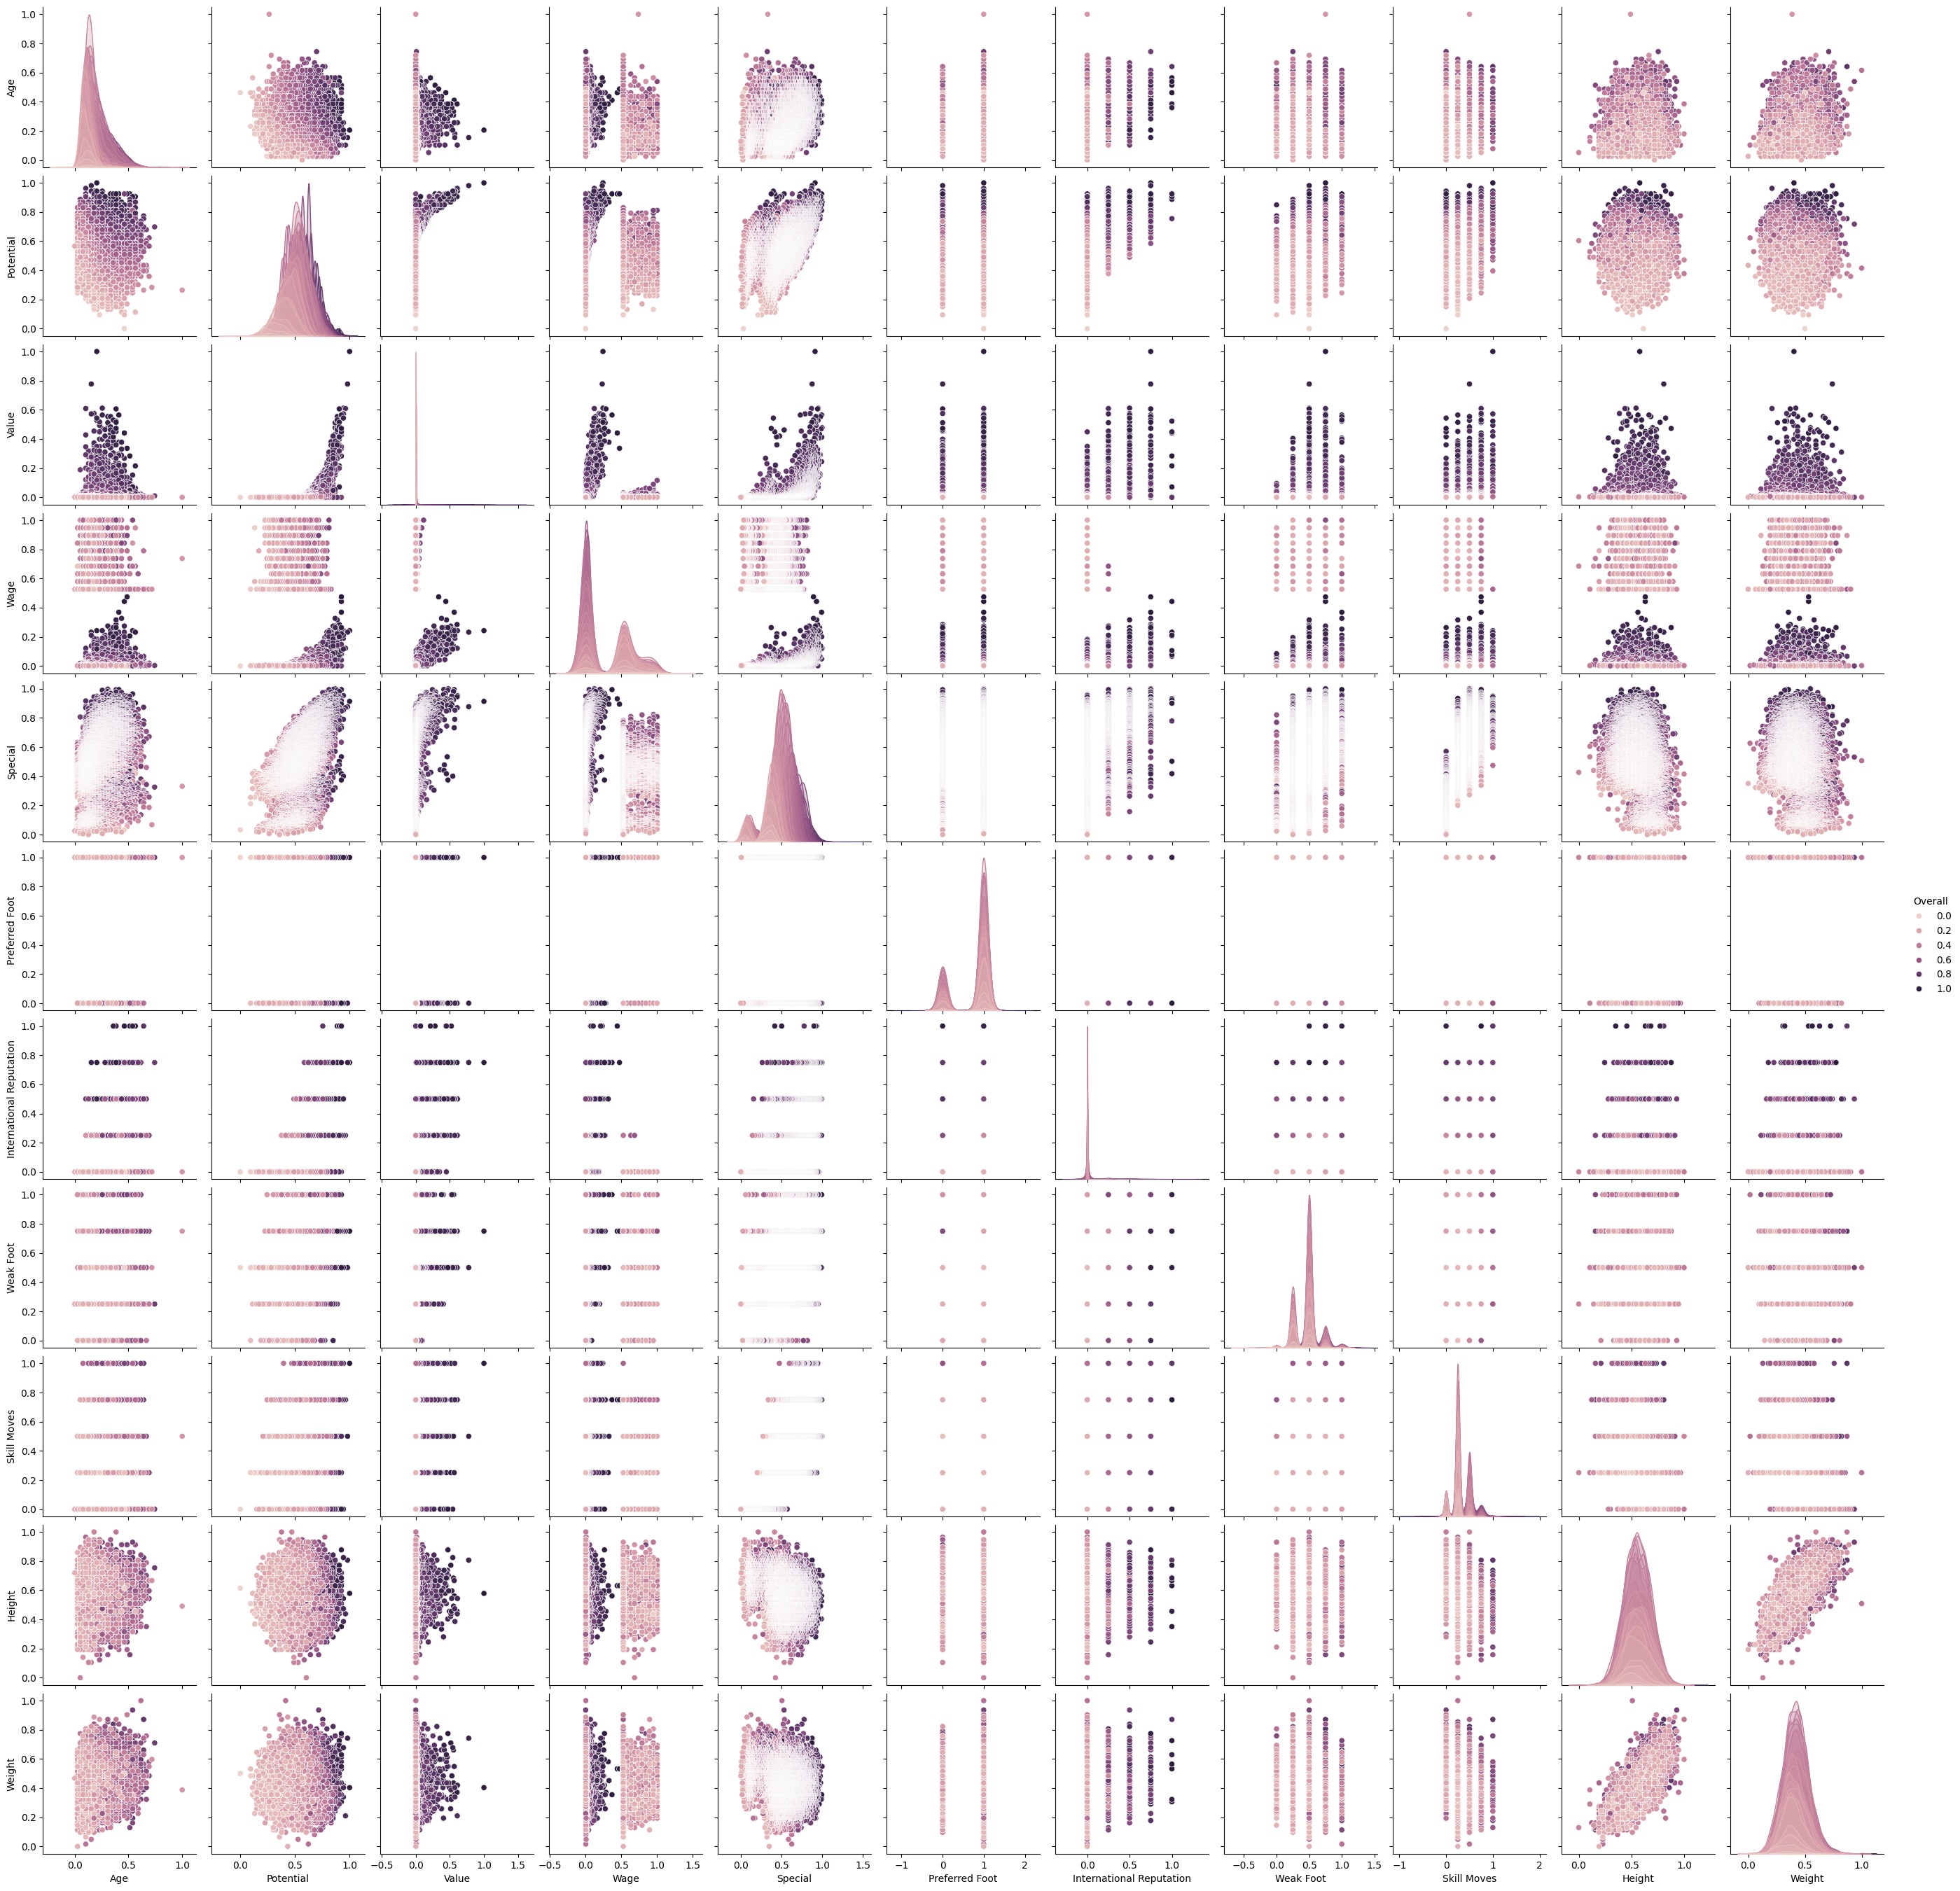

In [16]:
sns.pairplot(fifa_limpio, hue='Overall')

Analizando las gráficas, observamos que los datos no presentan una dispersión clara en ninguna de sus características. Por esta razón, comenzamos el análisis utilizando Overall y Edad, pero los resultados no fueron favorables para aplicar el modelo GMM. Luego, probamos con Special y Overall, obteniendo un resultado similar.

Finalmente, tras evaluar diversas combinaciones, optamos por utilizar Overall y Value, ya que es razonable suponer que a mayor evaluación de un jugador, mayor podría ser su valor en el mercado.


In [17]:
#Seleccionamos para la prueba el feacture 2 que es el que meustra mejor dispersion
X_2d = fifa_limpio.iloc[:, [1,3]]
X_2d

,Overall,Value
0,0.916667,0.477690
1,0.895833,0.412073
2,0.875000,0.244094
3,1.000000,0.564304
4,0.895833,0.469816
...,...,...
17655,0.104167,0.000525
17656,0.104167,0.000525
17657,0.166667,0.000367
17658,0.145833,0.000472


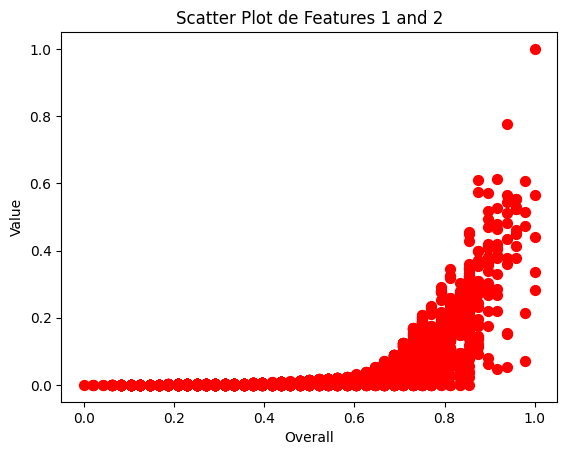

In [18]:
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], marker='o', color='r', s=50)
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Scatter Plot de Features 1 and 2')
plt.show()

La gráfica sugiere que solo algunos jugadores con alta evaluación tienen un valor significativamente mayor, aunque hay una tendencia creciente no todos los judadores con mayor Overall tienen un valor alto lo que nos lleva a entender que hay otras factores que influyen en el valor del jugador, como la edad, la nacionalidad entre otras.


In [19]:
# Inicializar aleatoriamente los theta_old
# Fija el número de clusters K = 3
np.random.seed(42)
pi1 = 0.25
pi2 = 0.45
pi3 = 0.3
mu_1 = np.random.randn(2,) + np.reshape([0.1,0.1],(2,))
mu_2 = np.random.randn(2,) + np.reshape([0.4,0.9],(2,))
mu_3 = np.random.randn(2,) + np.reshape([0.6,0.4],(2,))

In [20]:
aux = np.random.randn(2,2)
print(aux)
print(aux.T)
print(aux.T@aux)

[[ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]
[[ 1.57921282 -0.46947439]
 [ 0.76743473  0.54256004]]
[[2.71431932 0.95722472]
 [0.95722472 0.88332746]]


In [21]:
aux = np.random.randn(2,2)
Sigma_1 =0.5*aux.T@aux
aux2 = np.random.randn(2,2)
Sigma_2 = 0.5*aux2.T@aux2
aux3 = np.random.randn(2,2)
Sigma_3 = 0.5*aux3.T@aux3
print(Sigma_1, np.linalg.det(Sigma_1))
print(Sigma_2, np.linalg.det(Sigma_2))
print(Sigma_3, np.linalg.det(Sigma_3))

[[ 0.13665085 -0.12355711]
 [-0.12355711  1.93877275]] 0.24966858280658477
[[2.0005842  0.32581015]
 [0.32581015 0.20745933]] 0.3088875935403325
[[1.48631702 0.4757485 ]
 [0.4757485  1.02278834]] 1.2938510792552076


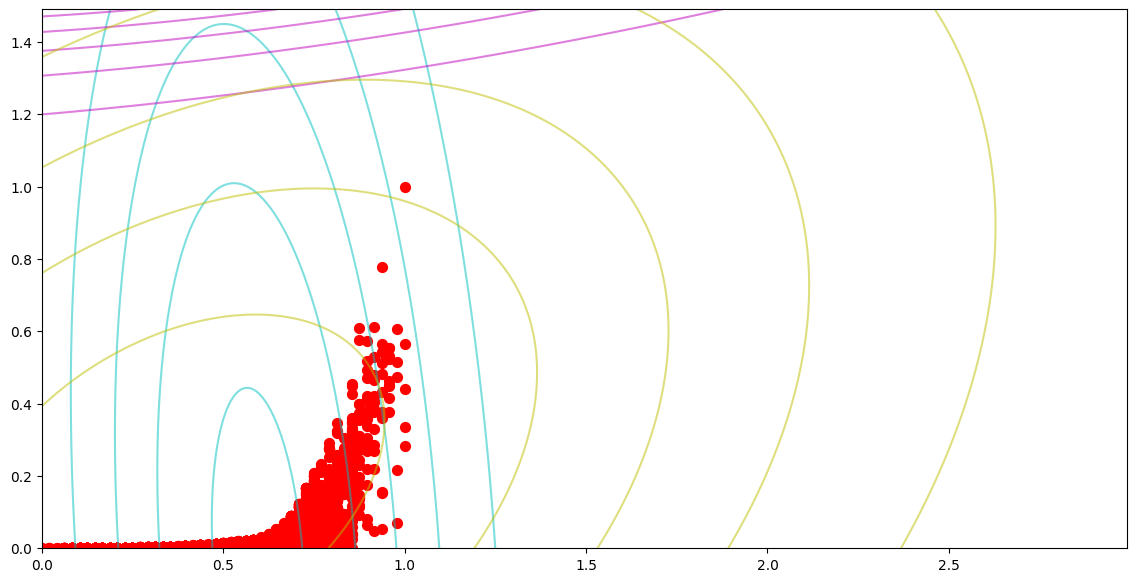

In [22]:
# Graficamos el ajuste inicial
# Se crea la matriz de datos
x, y = np.mgrid[0:3:.01, 0:1.5:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(mu_1, Sigma_1)
rv2 = multivariate_normal(mu_2, Sigma_2)
rv3 = multivariate_normal(mu_3, Sigma_3)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(14, 7))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], marker='o', color='r', s=50)

En esta gráfica podemos visulizar el sesgo que tienen los datos a la derecha, y esto es porque los datos estan concentados la mayor parte de una region muy pequeña lo que puede afectar mas adelante a la identificacion de multiples grupos

In [23]:
gama_Znk = np.zeros((X_2d.shape[0],3)) # Matriz de responsabilidades o Posterior P(zn|xn)

for n in range(X_2d.shape[0]):
  x_n = X_2d.iloc[n,:]
  for k in range(3):
    if k == 0:
      gama_Znk[n,k] = pi1 * multivariate_normal.pdf(x_n, mu_1, Sigma_1)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 1:
      gama_Znk[n,k] = pi2 * multivariate_normal.pdf(x_n, mu_2, Sigma_2)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 2:
      gama_Znk[n,k] = pi3 * multivariate_normal.pdf(x_n, mu_3, Sigma_3)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))

print(gama_Znk)

[[5.50050609e-01 9.57465396e-06 4.49939816e-01]
 [5.66747231e-01 4.12539624e-06 4.33248644e-01]
 [5.91516957e-01 4.25317994e-07 4.08482617e-01]
 ...
 [4.87336880e-01 6.53554351e-08 5.12663055e-01]
 [4.70203089e-01 7.06119466e-08 5.29796841e-01]
 [4.70203089e-01 7.06119466e-08 5.29796841e-01]]


In [24]:
len(X_2d)

17660

In [25]:
X_2d.columns

Index(['Overall', 'Value'], dtype='object')

In [26]:
# Construirmos el modelo discriminante
N1, N2, N3 = 5886,5886,5886
N = N1+N2+N3
piC1 = N1/N
piC2 = N2/N
piC3 = N3/N

X_d2 = X_2d

X_C1 = X_d2.iloc[:5886, :]
X_C2 = X_d2.iloc[5886:11772, :]
X_C3 = X_d2.iloc[11772:, :]

muC1 = np.mean(X_C1, axis=0)
muC2 = np.mean(X_C2, axis=0)
muC3 = np.mean(X_C3, axis=0)

M1 = np.repeat(muC1.values.reshape(1, -1), N1, axis=0)
M2 = np.repeat(muC2.values.reshape(1, -1), N2, axis=0)
M3 = np.repeat(muC3.values.reshape(1, -1), N3, axis=0)

S1 = np.cov(X_C1, rowvar=False, bias=True)
S2 = np.cov(X_C2, rowvar=False, bias=True)
S3 = np.cov(X_C3, rowvar=False, bias=True)

Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

In [27]:
w_C1 = np.linalg.inv(Sigma).dot(muC1)
w_C2 = np.linalg.inv(Sigma).dot(muC2)
w_C3 = np.linalg.inv(Sigma).dot(muC3)

w_10 = -0.5 * (muC1.T.dot(np.linalg.inv(Sigma)).dot(muC1)) + np.log(piC1)
w_20 = -0.5 * (muC2.T.dot(np.linalg.inv(Sigma)).dot(muC2))+ np.log(piC2)
w_30 = -0.5 * (muC3.T.dot(np.linalg.inv(Sigma)).dot(muC3))+ np.log(piC3)

A1 = w_C1.T.dot(X_d2.T) + w_10
A2 = w_C2.T.dot(X_d2.T) + w_20
A3 = w_C3.T.dot(X_d2.T) + w_30

A = np.vstack((A1,A2,A3)).T

In [28]:
postCk = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
postCk

array([[0.97682275, 0.00612004, 0.01705721],
       [0.98263611, 0.00721453, 0.01014936],
       [0.99181884, 0.00692825, 0.00125291],
       ...,
       [0.00191524, 0.16795223, 0.83013253],
       [0.00121394, 0.14260679, 0.85617927],
       [0.00121394, 0.14260679, 0.85617927]])

In [29]:
Sigma

array([[0.01383604, 0.00229374],
       [0.00229374, 0.00149745]])

<ipython-input-30-caba5e7d0e68>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(muC1[0], muC1[1], marker='d', color='c', s=100, label='Class 1')
<ipython-input-30-caba5e7d0e68>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(muC2[0], muC2[1], marker='d', color='m', s=100, label='Class 2')
<ipython-input-30-caba5e7d0e68>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(muC3[0], muC3[1], marker

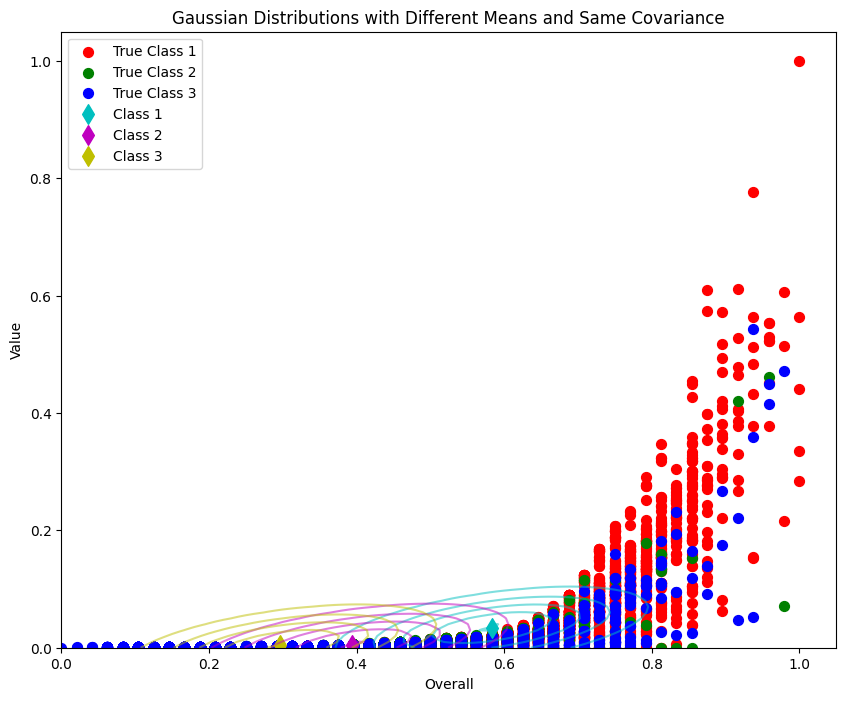

In [30]:
# Create a grid of points
x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(muC1, Sigma)
rv2 = multivariate_normal(muC2, Sigma)
rv3 = multivariate_normal(muC3, Sigma)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 8))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)

# Plot the means of each class
plt.scatter(X_C1.iloc[:,0], X_C1.iloc[:,1], marker='o', color='r', s=50, label='True Class 1')
plt.scatter(X_C2.iloc[:,0], X_C2.iloc[:,1], marker='o', color='g', s=50, label='True Class 2')
plt.scatter(X_C3.iloc[:,0], X_C3.iloc[:,1], marker='o', color='b', s=50, label='True Class 3')

plt.scatter(muC1[0], muC1[1], marker='d', color='c', s=100, label='Class 1')
plt.scatter(muC2[0], muC2[1], marker='d', color='m', s=100, label='Class 2')
plt.scatter(muC3[0], muC3[1], marker='d', color='y', s=100, label='Class 3')

plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Gaussian Distributions with Different Means and Same Covariance')
plt.legend()
plt.show()

Se siguen visualizando una baja dispersion de los datos ostrando un alta concentracion en 1 para el Value y Overall

In [31]:
if np.any(np.isnan(X_2d)) or np.any(np.isinf(X_2d)):
    print("Warning: X_2d contiene datos nulos o infinitos ")

este es las cáracteriísticas evaluadas        Potential    Height
0       0.867925  0.701754
1       0.849057  0.526316
2       0.811321  0.403509
3       0.924528  0.561404
4       0.886792  0.403509
...          ...       ...
17655   0.358491  0.719298
17656   0.415094  0.807018
17657   0.264151  0.719298
17658   0.433962  0.666667
17659   0.358491  0.649123

[17660 rows x 2 columns]


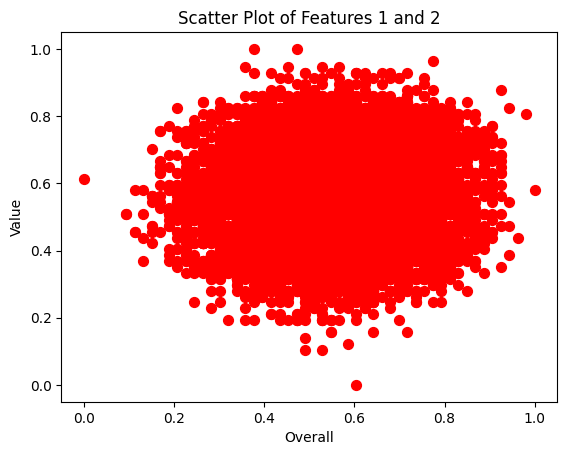

In [32]:
# Initialize parameters

X = fifa_limpio.drop('Overall', axis=1)
y = fifa_limpio['Value']
X_2d = X.iloc[:,[1,9]]
print(f'este es las cáracteriísticas evaluadas {X_2d}')
X_2d = X_2d.to_numpy()

# Scatter plot of first two features
plt.scatter(X_2d[:, 0], X_2d[:, 1], marker='o', color='r', s=50)
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Scatter Plot of Features 1 and 2')
plt.show()

No se percibe una relación lineal entre Overall y Value, lo que confirma que estos datos no son adecuados para una segmentación en grupos o clústeres. La dispersión uniforme y la ausencia de patrones claros indican que no hay una separación evidente entre posibles categorías

#Modelo de Mezclas Gaussianas

In [33]:
K = 3  # Number of clusters
n, d = X_2d.shape
epsilon = 1e-6  # Small value to prevent log(0)
# Mixing coefficients (initial uniform distribution)
pi = np.ones(K) / K
# Initialize means using random samples from data
random_indices = np.random.choice(n, K, replace=False)
mu = X_2d[random_indices, :]


In [34]:
# Function to generate a positive definite covariance matrix
def generate_positive_definite_matrix(d):
    A = np.random.randn(d, d)
    return np.dot(A, A.T) + np.eye(d) * epsilon  # Add identity for stability

# Initialize covariance matrices
Sigma = np.array([generate_positive_definite_matrix(d) for _ in range(K)])

In [35]:
# Ensure covariance matrix is positive definite
def ensure_positive_definite(Sigma):
    return Sigma + np.eye(Sigma.shape[0]) * epsilon

In [36]:
# Expectation Step (E-step)
def expectation_step(X, mu, Sigma, pi):
    """ Compute responsibilities (γ) given current parameters. """
    gamma = np.zeros((n, K))
    print("Este es el valor de Gama", gamma)
    for k in range(K):
        try:
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=ensure_positive_definite(Sigma[k]))
        except np.linalg.LinAlgError:
            print(f"Warning: Fixing singular covariance matrix for cluster {k}")
            Sigma[k] = ensure_positive_definite(Sigma[k])
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=Sigma[k])

    gamma += epsilon  # Prevents division by zero
    gamma /= gamma.sum(axis=1, keepdims=True)  # Normalize
    return gamma

In [37]:
# Maximization Step (M-step)
def maximization_step(X, gamma):
    """ Update parameters based on responsibilities. """
    Nk = gamma.sum(axis=0)  # Effective cluster size
    pi_new = Nk / n  # Update mixing coefficients
    mu_new = np.dot(gamma.T, X) / Nk[:, np.newaxis]  # Update means

    Sigma_new = np.zeros((K, d, d))
    for k in range(K):
        X_centered = X - mu_new[k]
        Sigma_new[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk[k]
        Sigma_new[k] = ensure_positive_definite(Sigma_new[k])  # Ensure positive definiteness

    return pi_new, mu_new, Sigma_new

In [38]:
# Compute Log-Likelihood
def compute_log_likelihood(X, pi, mu, Sigma):
    """ Compute the Log-Likelihood to monitor convergence. """
    log_likelihood = 0
    for k in range(K):
        try:
            prob = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=ensure_positive_definite(Sigma[k]))
            prob += epsilon  # Prevents log(0)
            log_likelihood += np.sum(np.log(prob))
        except np.linalg.LinAlgError:
            print(f"Warning: Fixing covariance matrix for cluster {k}")
            Sigma[k] = ensure_positive_definite(Sigma[k])
            prob = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=Sigma[k]) + epsilon
            log_likelihood += np.sum(np.log(prob))

    return log_likelihood

Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 1, Log-Likelihood: 6750.4030
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 2, Log-Likelihood: 6750.8398
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 3, Log-Likelihood: 6751.1303
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 4, Log-Likelihood: 6751.3029
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 5, Log-Likelihood: 6751.3786
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 6, Log-Likelihood: 6751.3725
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 7, Log-Likelihood: 6751.2957
Este e

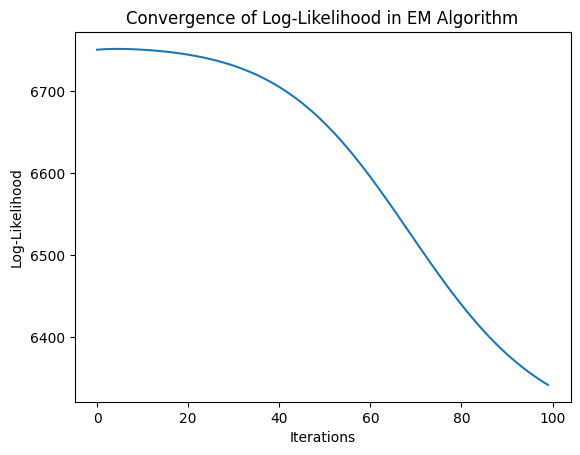

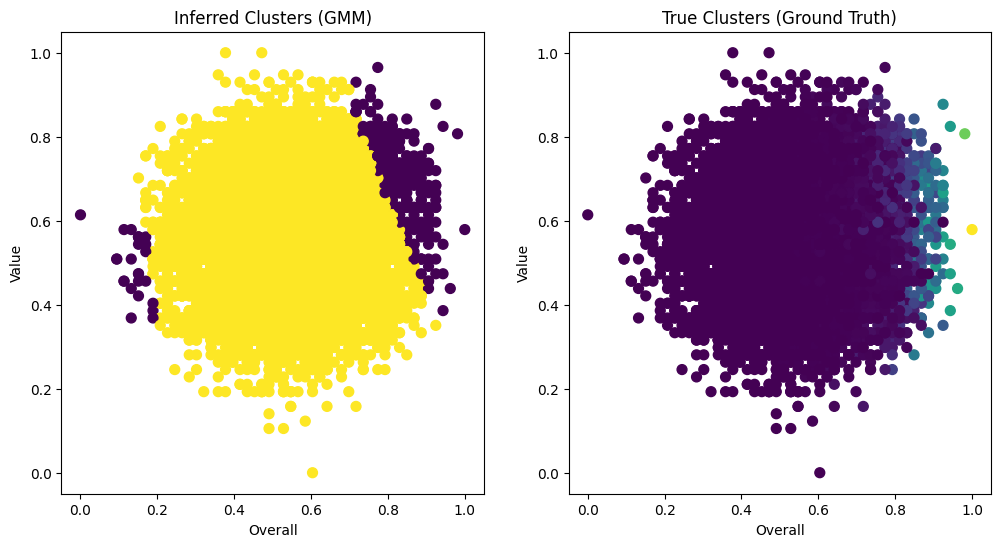

In [39]:
# EM Algorithm for GMM
max_iters = 100  # Maximum iterations
tol = 1e-4  # Convergence threshold
log_likelihoods = []
prev_log_likelihood = -np.inf  # Initialize with a very low value

for i in range(max_iters):
    gamma = expectation_step(X_2d, mu, Sigma, pi)
    pi, mu, Sigma = maximization_step(X_2d, gamma)

    # Compute log-likelihood
    log_likelihood = compute_log_likelihood(X_2d, pi, mu, Sigma)
    log_likelihoods.append(log_likelihood)

    print(f"Iteration {i+1}, Log-Likelihood: {log_likelihood:.4f}")

    # Check for convergence
    if np.abs(log_likelihood - prev_log_likelihood) < tol:
        print(f"Converged at iteration {i+1}.")
        break
    prev_log_likelihood = log_likelihood

# Plot log-likelihood evolution
plt.plot(log_likelihoods)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Convergence of Log-Likelihood in EM Algorithm')
plt.show()

# Assign cluster labels based on maximum responsibility
Z = np.argmax(gamma, axis=1)

# Visualization: True vs Predicted Clusters
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

# Plot predicted clusters
ax[0].scatter(X_2d[:, 0], X_2d[:, 1], marker='o', c=Z, s=50, cmap='viridis')
ax[0].set_xlabel('Overall')
ax[0].set_ylabel('Value')
ax[0].set_title('Inferred Clusters (GMM)')

# Plot ground truth clusters
ax[1].scatter(X_2d[:, 0], X_2d[:, 1], marker='o', c=y, s=50, cmap='viridis')
ax[1].set_xlabel('Overall')
ax[1].set_ylabel('Value')
ax[1].set_title('True Clusters (Ground Truth)')

plt.show()

In [41]:
score = rand_score(y, Z)
print(f"Rand Score (Clustering Accuracy): {score:.4f}")

Rand Score (Clustering Accuracy): 0.0481


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


La  verosimilitud tiene una curva donde comienza alta y va cayendo lo que nos lleva a concluir que el modelo no esta encontrando una estructura optima en los datos. Aunque en las graficas de GMM trata de mostrar dos grupos iniciales,  los datos no se agrupan de forma clara, no representando una figura de cluster definidad.


En conclusion se sugiere que los datos no tienen una estructura de clusters clara, y la segmentación con GMM no es del todo efectiva. Además, la disminución en la verosimilitud indica que el modelo no se está ajustando de manera óptima, lo que podría requerir una reevaluación del enfoque de agrupamiento o buscar otras tecnicas como PCA.